In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

## 1. Read in the file using pandas, and look at the first five rows

In [2]:
df = pd.read_excel("KyotoFullFlower7.xls", skiprows = 25, na_values ='-')
# df = df.replace(['-', 'NaN'], np.nan)

## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time add a parameter to make sure your columns look right.

**TIP: The first year should be 801 AD, and it should not have any dates or anything.**

In [3]:
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


## 3. Look at the final five rows of the data

In [4]:
df.tail()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 4. Add some more NaN values

It looks like you should probably have some NaN/missing values earlier on in the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

In [5]:
df.columns

Index(['AD', 'Full-flowering date (DOY)', 'Full-flowering date', 'Source code',
       'Data type code', 'Reference Name'],
      dtype='object')

## 4. What source is the most common as a reference?

In [6]:
df['Reference Name'].value_counts().head(5)

NEWS-PAPER(ARASHIYAMA)        94
SUGIURAKE-NIKKI               38
MYOHOIN-HINAMIKI              32
OYUDONONO-UENO-NIKKI          26
OYUDONONO-UENO-NIKKI [EDA]    21
Name: Reference Name, dtype: int64

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

If you'd like to do it in two steps (which might be easier to think through), first figure out how to test whether a column is empty/missing/null/NaN, get the list of `True`/`False` values, and then later feed it to your `df`.

In [7]:
flowering_df = df[df['Full-flowering date (DOY)'].notnull()]
flowering_df.head(20)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
63,864,100.0,409.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU
65,866,106.0,416.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU
68,869,95.0,405.0,5.0,2.0,KANKE-BUNSOU
88,889,104.0,414.0,5.0,2.0,NIPPON-SANDAI-JITSUROKU
90,891,109.0,419.0,5.0,4.0,NIHONKIRYAKU


## 7. Make a histogram of the full-flowering date

Is it not showing up? Remember the "magic" command that makes graphs show up in matplotlib notebooks!

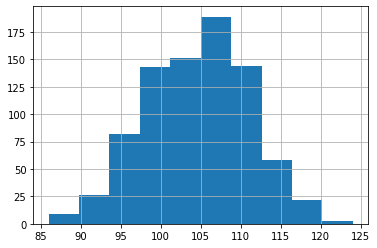

In [8]:
flowering_df['Full-flowering date (DOY)'].hist()

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

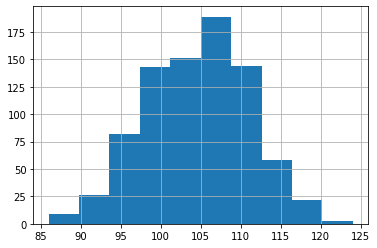

In [9]:
flowering_df['Full-flowering date (DOY)'].hist(bins=10)

## 9. What's the average number of days it takes for the flowers to blossom? And how many records do we have?

Answer these both with one line of code.

In [10]:
(flowering_df['Full-flowering date (DOY)']).describe()

count    827.000000
mean     104.540508
std        6.407036
min       86.000000
25%      100.000000
50%      105.000000
75%      109.000000
max      124.000000
Name: Full-flowering date (DOY), dtype: float64

## 10. What's the average days into the year cherry flowers normally blossomed before 1900?



In [11]:
df[df.AD < 1900]['Full-flowering date (DOY)'].mean()

105.20728291316527

## 11. How about after 1900?

In [12]:
df[df.AD > 1900]['Full-flowering date (DOY)'].mean()

100.3125

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [13]:
df['Data type code'] = df['Data type code'].replace({
    0: 'data from modern times',
    1.0: 'diary description about full-bloom',
    2.0: 'diary description about cherry blossom viewing party',
    3.0: 'diary description about presents of cherry twigs from party participants',
    4.0: 'title in Japanese poetry',
    8.0: 'Deduced from wisteria phenology, using the relation proposed by Aono and Saito (2010)',
    9.0: 'Deduced from Japanese kerria phenology, using the relation proposed by Aono (2011)'
})

In [14]:
df['Data type code'].value_counts()

diary description about cherry blossom viewing party                                     454
diary description about full-bloom                                                       166
data from modern times                                                                   124
title in Japanese poetry                                                                  39
diary description about presents of cherry twigs from party participants                  30
Deduced from wisteria phenology, using the relation proposed by Aono and Saito (2010)     11
Deduced from Japanese kerria phenology, using the relation proposed by Aono (2011)         3
Name: Data type code, dtype: int64

## 13. Show only the years where our data was from a title in Japanese poetry

In [15]:
df[df['Data type code'] == 'title in Japanese poetry'].head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
90,891,109.0,419.0,5.0,title in Japanese poetry,NIHONKIRYAKU
94,895,104.0,414.0,5.0,title in Japanese poetry,NIHONKIRYAKU
95,896,104.0,413.0,5.0,title in Japanese poetry,NIPPON-SANDAI-JITSUROKU
122,923,104.0,414.0,5.0,title in Japanese poetry,ZOKU-KOKIN-WAKASHU
154,955,89.0,330.0,5.0,title in Japanese poetry,SHUISHO


## 14. Graph the full-flowering date (DOY) over time

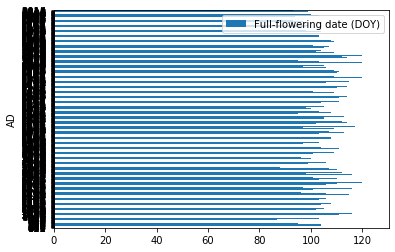

In [16]:
flowering_df.plot(x='AD', y='Full-flowering date (DOY)', kind='barh')

# df['Full-flowering date (DOY)'] = pd.to_datetime(df.date, format="%d-%b-%y")

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [17]:
df['rolling_date'] = df.rolling(20, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean()

Use the code above to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

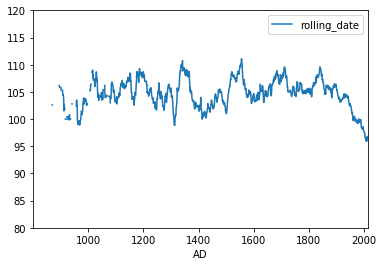

In [19]:
df.plot(x='AD', y='rolling_date', ylim=(80, 120))

### 16. Add a month column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

**I've given you March as an example**, you just need to add in two more lines to do April and May.

In [20]:
df.loc[df['Full-flowering date'] < 600, 'month'] = 'May'

In [21]:
df.loc[df['Full-flowering date'] < 500, 'month'] = 'April'

In [22]:
df.loc[df['Full-flowering date'] < 400, 'month'] = 'March'

### 17. Using your new column, how many blossomings happened in each month?

In [23]:
df.month.value_counts()

April    814
March     10
May        3
Name: month, dtype: int64

### 18. Graph how many blossomings happened in each month.

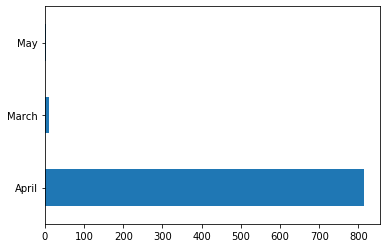

In [24]:
df.month.value_counts().plot(kind='barh')

## 19. Adding a day-of-month column

Now we're going to add a new column called "day of month." It's actually a little tougher than it should be since the `Full-flowering date` column is a *float* instead of an integer.

In [25]:
# df['day_of_month'] = df.

df.tail(20)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,rolling_date,month
1195,1996,103.0,412.0,4.0,data from modern times,NEWS-PAPER(ARASHIYAMA),98.40,April
1196,1997,97.0,407.0,4.0,data from modern times,NEWS-PAPER(ARASHIYAMA),98.60,April
1197,1998,91.0,401.0,4.0,data from modern times,NEWS-PAPER(ARASHIYAMA),97.95,April
1198,1999,94.0,404.0,4.0,data from modern times,NEWS-PAPER(ARASHIYAMA),97.80,April
1199,2000,100.0,409.0,4.0,data from modern times,NEWS-PAPER(ARASHIYAMA),97.70,April
1200,2001,96.0,406.0,4.0,data from modern times,NEWS-PAPER(ARASHIYAMA),97.55,April
1201,2002,91.0,401.0,4.0,data from modern times,NEWS-PAPER(ARASHIYAMA),97.45,April
1202,2003,98.0,408.0,4.0,data from modern times,NEWS-PAPER(ARASHIYAMA),97.40,April
1203,2004,92.0,401.0,4.0,data from modern times,NEWS-PAPER(ARASHIYAMA),96.55,April
1204,2005,99.0,409.0,4.0,data from modern times,NEWS-PAPER(ARASHIYAMA),96.55,April


And if you try to convert it to an int, **pandas yells at you!**

That's because, as you can read, you can't have an `NaN` be an integer. But, for some reason, it *can* be a float. Ugh! So what we'll do is **drop all of the na values, then convert them to integers to get rid of the decimals.**

I'll show you the first 5 here.

In [26]:
df['Full-flowering date'].dropna().astype(int).head()

11    401
14    415
30    406
50    418
52    414
Name: Full-flowering date, dtype: int64

On the next line, I take the first character of the row and add a bunch of exclamation points on it. I want you to edit this code to **return the last TWO digits of the number**. This only shows you the first 5, by the way.

You might want to look up 'list slicing.'

In [27]:
df['day-of-month'] = df['Full-flowering date'].dropna().astype(int).astype(str).apply(lambda value: value[-2:])

Now that you've successfully extracted the last two letters, save them into a new column called `'day-of-month'`

In [28]:
df

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,rolling_date,month,day-of-month
0,801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 20. Adding a date column

Now take the `'month'` and `'day-of-month'` columns and combine them in order to create a new column called `'date'`

In [29]:
df['date'] = df['month'] + " " + df['day-of-month']

In [30]:
df

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,rolling_date,month,day-of-month,date
0,801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# YOU ARE DONE.

And **incredible.**

In [31]:
print('Woohoo!!!')

Woohoo!!!
